# Capstone Project - The Battle of Neighborhoord

## Week 2 - Project Coding

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values


from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np

from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library


import matplotlib.cm as cm
import matplotlib.colors as colors

In [1]:
from sklearn.cluster import KMeans

In [3]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [4]:
import json

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
neighborhoods_data = newyork_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)


In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


## Now that we have our data, we will segment it in 5 different segments to analyze every borough as their own.

In [9]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
queens_data = neighborhoods[neighborhoods['Borough']=='Queens'].reset_index(drop=True)
bronx_data = neighborhoods[neighborhoods['Borough']=='Bronx'].reset_index(drop=True)
brooklyn_data = neighborhoods[neighborhoods['Borough']=='Brooklyn'].reset_index(drop=True)
staten_data = neighborhoods[neighborhoods['Borough']=='Staten Island'].reset_index(drop=True)

In [10]:
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [11]:
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [12]:
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [13]:
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [14]:
staten_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


In [15]:
address1 = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7127281, -74.0060152.


In [16]:
address2 = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.7127281, -74.0060152.


In [17]:
address3 = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.7127281, -74.0060152.


In [18]:
address4 = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Staten Island are 40.7127281, -74.0060152.


In [19]:
address5 = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7127281, -74.0060152.


## Now that we have all our data segmented by borough and every location latitude and longitude, we are going to generate the map for every Borough.

### Manhattan Map

In [20]:
map_manhattan = folium.Map(location=[40.7896239, -73.9598939], zoom_start=12)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### Brooklyn Map

In [21]:
map_brooklyn = folium.Map(location=[40.6501038, -73.9495823], zoom_start=12)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

### Bronx Map

In [22]:
map_bronx = folium.Map(location=[40.8466508, -73.8785937], zoom_start=12)

# add markers to map
for lat, lng, label in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

### Queens Map

In [23]:
map_queens = folium.Map(location=[40.7498243, -73.7976337], zoom_start=12)

# add markers to map
for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

### Staten Island Map

In [24]:
map_staten = folium.Map(location=[40.5834557, -74.1496048], zoom_start=12)

# add markers to map
for lat, lng, label in zip(staten_data['Latitude'], staten_data['Longitude'], staten_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_staten)  
    
map_staten

---

## To continue with our project we will need to use the Foursquare API, let's define it's credentials.

In [25]:
CLIENT_ID = 'PU5ZMF31IOPEHNFAI3PO2XAFJWKS5F0US1Z35ZFMSM0DPZKU' # your Foursquare ID
CLIENT_SECRET = 'G2ACZ3JT12WNGY42GGWQDI30VG4QICMLJJAYYZ1ONWRWIJU1' # your Foursquare Secret
VERSION = '20211504' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PU5ZMF31IOPEHNFAI3PO2XAFJWKS5F0US1Z35ZFMSM0DPZKU
CLIENT_SECRET:G2ACZ3JT12WNGY42GGWQDI30VG4QICMLJJAYYZ1ONWRWIJU1


In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Now that we are connected to Foursquare API and we define the function to get every neighborhood venue, we will run the function for every Borough on our data set.

In [27]:
manhattan_venues = getNearbyVenues(names = manhattan_data['Neighborhood'],latitudes = manhattan_data['Latitude'],
                                  longitudes = manhattan_data['Longitude'])
bronx_venues = getNearbyVenues(names = bronx_data['Neighborhood'],latitudes = bronx_data['Latitude'],
                                  longitudes = bronx_data['Longitude'])
queens_venues = getNearbyVenues(names = queens_data['Neighborhood'],latitudes = queens_data['Latitude'],
                                  longitudes = queens_data['Longitude'])
brooklyn_venues = getNearbyVenues(names = brooklyn_data['Neighborhood'],latitudes =brooklyn_data['Latitude'],
                                  longitudes = brooklyn_data['Longitude'])
staten_venues = getNearbyVenues(names = staten_data['Neighborhood'],latitudes = staten_data['Latitude'],
                                  longitudes = staten_data['Longitude'])

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards
Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Oli

## What we are going to do next is to analyze the top 10 venues for every neighborhood. With this information we will notice which neighborhoods had as top 10 venues restaurants and what type of cuisine does the restaurant have.

## 1. Manhattan

In [28]:
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()


In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
man_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
man_neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    man_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

man_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Playground,Gym,Clothing Store,BBQ Joint,Burger Joint,Beer Garden
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Bookstore,French Restaurant,Cosmetics Shop,Gym,Pizza Place,Wine Shop,Gym / Fitness Center
2,Central Harlem,Public Art,Gym / Fitness Center,Seafood Restaurant,Bar,Fried Chicken Joint,Art Gallery,French Restaurant,Chinese Restaurant,African Restaurant,American Restaurant
3,Chelsea,Coffee Shop,Bakery,French Restaurant,American Restaurant,Art Gallery,Nightclub,Italian Restaurant,Wine Shop,Seafood Restaurant,Ice Cream Shop
4,Chinatown,Bakery,Chinese Restaurant,Cocktail Bar,Hotpot Restaurant,American Restaurant,Spa,Dessert Shop,Salon / Barbershop,Ice Cream Shop,Boutique


## 2. Brooklyn

In [31]:
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
brook_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
brook_neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    brook_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

brook_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Chinese Restaurant,Gas Station,Pizza Place,Donut Shop,Dessert Shop,Italian Restaurant,Fast Food Restaurant,Bubble Tea Shop,Pharmacy,Halal Restaurant
1,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Chinese Restaurant,American Restaurant,Bar,Greek Restaurant,Playground,Sandwich Place
2,Bedford Stuyvesant,Coffee Shop,Pizza Place,Café,Bar,Playground,Cocktail Bar,Community Center,Boutique,Gourmet Shop,Gift Shop
3,Bensonhurst,Chinese Restaurant,Pizza Place,Donut Shop,Ice Cream Shop,Sushi Restaurant,Italian Restaurant,Spa,Noodle House,Smoke Shop,Grocery Store
4,Bergen Beach,Harbor / Marina,Playground,Park,Athletics & Sports,Baseball Field,Other Repair Shop,Paper / Office Supplies Store,Pakistani Restaurant,Outlet Store,Outdoors & Recreation


## 3. Bronx

In [33]:
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]

bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
bronx_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
bronx_neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    bronx_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

bronx_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Deli / Bodega,Supermarket,Discount Store,Dessert Shop,Chinese Restaurant,Spa,Bus Station,Gas Station,Pharmacy
1,Baychester,Donut Shop,Burger Joint,Mexican Restaurant,Pet Store,Spanish Restaurant,Bus Station,Shopping Mall,Other Great Outdoors,Fried Chicken Joint,Supermarket
2,Bedford Park,Diner,Pizza Place,Mexican Restaurant,Chinese Restaurant,Sandwich Place,Deli / Bodega,Baseball Field,Grocery Store,Bus Station,Pub
3,Belmont,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Sandwich Place,Dessert Shop,Grocery Store,Bank,Bar,Shoe Store
4,Bronxdale,Chinese Restaurant,Deli / Bodega,Pizza Place,Breakfast Spot,Supermarket,Gym,Mexican Restaurant,Performing Arts Venue,Bank,Spanish Restaurant


## 4. Queens

In [35]:
queens_onehot = pd.get_dummies(queens_venues[['Venue Category']], prefix="", prefix_sep="")
queens_onehot['Neighborhood'] = queens_venues['Neighborhood'] 
fixed_columns = [queens_onehot.columns[-1]] + list(queens_onehot.columns[:-1])
queens_onehot = queens_onehot[fixed_columns]

queens_grouped = queens_onehot.groupby('Neighborhood').mean().reset_index()

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
queens_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
queens_neighborhoods_venues_sorted['Neighborhood'] = queens_grouped['Neighborhood']

for ind in np.arange(queens_grouped.shape[0]):
    queens_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(queens_grouped.iloc[ind, :], num_top_venues)

queens_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Surf Spot,Metro Station,Sandwich Place,Coffee Shop,Donut Shop,Burrito Place,Café,Board Shop,Beach,Bus Stop
1,Astoria,Bar,Middle Eastern Restaurant,Greek Restaurant,Hookah Bar,Indian Restaurant,Mediterranean Restaurant,Pizza Place,Bakery,Seafood Restaurant,Dessert Shop
2,Astoria Heights,Burger Joint,Museum,Italian Restaurant,Plaza,Playground,Bus Station,Pizza Place,Hostel,Supermarket,Bakery
3,Auburndale,Italian Restaurant,Athletics & Sports,Gymnastics Gym,Sushi Restaurant,Noodle House,Mattress Store,Supermarket,Toy / Game Store,Bar,Comic Shop
4,Bay Terrace,Clothing Store,American Restaurant,Women's Store,Mobile Phone Shop,Cosmetics Shop,Kids Store,Donut Shop,Shoe Store,Bank,Furniture / Home Store


## 5. Staten Island

In [37]:
staten_onehot = pd.get_dummies(staten_venues[['Venue Category']], prefix="", prefix_sep="")
staten_onehot['Neighborhood'] = staten_venues['Neighborhood'] 
fixed_columns = [staten_onehot.columns[-1]] + list(staten_onehot.columns[:-1])
staten_onehot = staten_onehot[fixed_columns]

staten_grouped = staten_onehot.groupby('Neighborhood').mean().reset_index()

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
staten_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
staten_neighborhoods_venues_sorted['Neighborhood'] = staten_grouped['Neighborhood']

for ind in np.arange(staten_grouped.shape[0]):
    staten_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(staten_grouped.iloc[ind, :], num_top_venues)

staten_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Pizza Place,Restaurant,American Restaurant,Diner,Train Station,Dance Studio,Cosmetics Shop,Pharmacy,Food,Outlet Mall
1,Arden Heights,Pizza Place,Lawyer,Deli / Bodega,Bus Stop,Pharmacy,Coffee Shop,Yoga Studio,Outlet Mall,Park,Performing Arts Venue
2,Arlington,Liquor Store,American Restaurant,Grocery Store,Deli / Bodega,Boat or Ferry,Bus Stop,Coffee Shop,Pier,Outlet Mall,Park
3,Arrochar,Bus Stop,Deli / Bodega,Pizza Place,Italian Restaurant,Supermarket,Pharmacy,Food Truck,Polish Restaurant,Cosmetics Shop,Middle Eastern Restaurant
4,Bay Terrace,Supermarket,Shipping Store,Liquor Store,Donut Shop,Italian Restaurant,Insurance Office,Salon / Barbershop,Plaza,Sushi Restaurant,Grocery Store


## Now that we have every Neighborhood with each top 10 venues, is time for us to cluster our data using K-Means model.

### Manhattan Cluster

In [39]:
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)
man_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)
man_kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [40]:
man_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', man_kmeans.labels_)
manhattan_merged = manhattan_data
manhattan_merged = manhattan_merged.join(man_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Gym,Sandwich Place,Yoga Studio,Department Store,Steakhouse,Shopping Mall,Clothing Store,Coffee Shop,Seafood Restaurant,Diner
1,Manhattan,Chinatown,40.715618,-73.994279,1,Bakery,Chinese Restaurant,Cocktail Bar,Hotpot Restaurant,American Restaurant,Spa,Dessert Shop,Salon / Barbershop,Ice Cream Shop,Boutique
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Pizza Place,Grocery Store,Bank,Mobile Phone Shop,New American Restaurant,Deli / Bodega,Sandwich Place,Tapas Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Café,Restaurant,Bakery,Pizza Place,Lounge,Spanish Restaurant,Wine Bar,Caribbean Restaurant,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Park,Deli / Bodega,Yoga Studio,Bakery,Liquor Store,Indian Restaurant


In [41]:
man_map_clusters = folium.Map(location=[40.7896239, -73.9598939], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(man_map_clusters)
       
man_map_clusters

### Bronx Cluster

In [42]:
kclusters = 5

bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)
bronx_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)
bronx_kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2], dtype=int32)

In [43]:
bronx_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', bronx_kmeans.labels_)
bronx_merged = bronx_data
bronx_merged = bronx_merged.join(bronx_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bronx_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,1,Pharmacy,Dessert Shop,Deli / Bodega,Ice Cream Shop,Laundromat,Donut Shop,Sandwich Place,Accessories Store,Outlet Store,Paper / Office Supplies Store
1,Bronx,Co-op City,40.874294,-73.829939,2,Pizza Place,Accessories Store,Basketball Court,Donut Shop,Restaurant,Fast Food Restaurant,Pharmacy,Park,Bus Station,Discount Store
2,Bronx,Eastchester,40.887556,-73.827806,2,Bus Station,Caribbean Restaurant,Diner,Deli / Bodega,Seafood Restaurant,Food & Drink Shop,Bus Stop,Bowling Alley,Pizza Place,Platform
3,Bronx,Fieldston,40.895437,-73.905643,0,Plaza,River,Bus Station,Medical Supply Store,Accessories Store,Peruvian Restaurant,Nightclub,Other Great Outdoors,Outlet Store,Paper / Office Supplies Store
4,Bronx,Riverdale,40.890834,-73.912585,1,Bus Station,Park,Plaza,Playground,Gym,Home Service,Medical Supply Store,Baseball Field,Bank,Accessories Store


In [44]:
bronx_map_clusters = folium.Map(location=[40.8466508, -73.8785937], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(bronx_map_clusters)
       
bronx_map_clusters

### Brooklyn Cluster

In [45]:
kclusters = 5

brook_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)
brook_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brook_grouped_clustering)
brook_kmeans.labels_[0:10] 

array([0, 0, 0, 0, 3, 0, 2, 0, 2, 0], dtype=int32)

In [46]:
brook_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', brook_kmeans.labels_)
brook_merged = brooklyn_data
brook_merged = brook_merged.join(brook_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brook_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,0,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Chinese Restaurant,American Restaurant,Bar,Greek Restaurant,Playground,Sandwich Place
1,Brooklyn,Bensonhurst,40.611009,-73.995180,0,Chinese Restaurant,Pizza Place,Donut Shop,Ice Cream Shop,Sushi Restaurant,Italian Restaurant,Spa,Noodle House,Smoke Shop,Grocery Store
2,Brooklyn,Sunset Park,40.645103,-74.010316,2,Mexican Restaurant,Latin American Restaurant,Bank,Bakery,Pizza Place,Mobile Phone Shop,Gym,Fried Chicken Joint,Pharmacy,Creperie
3,Brooklyn,Greenpoint,40.730201,-73.954241,0,Bar,Coffee Shop,Cocktail Bar,Pizza Place,Record Shop,Deli / Bodega,French Restaurant,Grocery Store,Polish Restaurant,Yoga Studio
4,Brooklyn,Gravesend,40.595260,-73.973471,0,Pizza Place,Lounge,Bakery,Italian Restaurant,Bar,Furniture / Home Store,Donut Shop,Electronics Store,Pharmacy,Fish Market


In [47]:
brook_map_clusters = folium.Map(location=[40.6501038, -73.9495823], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brook_merged['Latitude'], brook_merged['Longitude'], brook_merged['Neighborhood'], brook_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(brook_map_clusters)
       
brook_map_clusters

### Queens Cluster

In [48]:
kclusters = 5

queens_grouped_clustering = queens_grouped.drop('Neighborhood', 1)
queens_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(queens_grouped_clustering)
queens_kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 4, 1, 1, 1], dtype=int32)

In [49]:
queens_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', queens_kmeans.labels_)
queens_merged = queens_data
queens_merged = queens_merged.join(queens_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

queens_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,1,Bar,Middle Eastern Restaurant,Greek Restaurant,Hookah Bar,Indian Restaurant,Mediterranean Restaurant,Pizza Place,Bakery,Seafood Restaurant,Dessert Shop
1,Queens,Woodside,40.746349,-73.901842,1,Grocery Store,Thai Restaurant,Bakery,Filipino Restaurant,Latin American Restaurant,American Restaurant,Donut Shop,Pub,Bar,Sandwich Place
2,Queens,Jackson Heights,40.751981,-73.882821,1,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Thai Restaurant,Mexican Restaurant,Diner,Spanish Restaurant,Grocery Store
3,Queens,Elmhurst,40.744049,-73.881656,1,Thai Restaurant,Bubble Tea Shop,Mexican Restaurant,Chinese Restaurant,Vietnamese Restaurant,Ice Cream Shop,Bar,Food Court,Sushi Restaurant,Seafood Restaurant
4,Queens,Howard Beach,40.654225,-73.838138,1,Pharmacy,Italian Restaurant,Sandwich Place,Deli / Bodega,Fast Food Restaurant,Ice Cream Shop,Tapas Restaurant,Flower Shop,Sushi Restaurant,Mexican Restaurant


In [92]:
queens_map_clusters = folium.Map(location=[40.7498243, -73.7976337], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(queens_merged['Latitude'], queens_merged['Longitude'], queens_merged['Neighborhood'], queens_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(queens_map_clusters)
       
queens_map_clusters

### Staten Island Cluster

In [51]:
kclusters = 5

staten_grouped_clustering = staten_grouped.drop('Neighborhood', 1)
staten_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(staten_grouped_clustering)
staten_kmeans.labels_[0:10] 

array([0, 0, 0, 3, 3, 1, 3, 3, 0, 0], dtype=int32)

In [52]:
staten_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', staten_kmeans.labels_)
staten_merged = staten_data
staten_merged = staten_merged.join(staten_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

staten_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Staten Island,St. George,40.644982,-74.079353,3.0,Clothing Store,Italian Restaurant,Sporting Goods Shop,Deli / Bodega,Bar,Coffee Shop,Farmers Market,Outlet Mall,Park,Scenic Lookout
1,Staten Island,New Brighton,40.640615,-74.087017,1.0,Bus Stop,Park,Bowling Alley,Deli / Bodega,Botanical Garden,Playground,Discount Store,Pet Store,Residential Building (Apartment / Condo),Outdoors & Recreation
2,Staten Island,Stapleton,40.626928,-74.077902,0.0,Pizza Place,Discount Store,Coffee Shop,Bar,Bank,Restaurant,Sandwich Place,Performing Arts Venue,Residential Building (Apartment / Condo),Park
3,Staten Island,Rosebank,40.615305,-74.069805,0.0,Grocery Store,Italian Restaurant,Discount Store,Cosmetics Shop,Breakfast Spot,Taco Place,Storage Facility,Museum,Pharmacy,Ice Cream Shop
4,Staten Island,West Brighton,40.631879,-74.107182,3.0,Coffee Shop,Salon / Barbershop,Bar,Bank,Breakfast Spot,Italian Restaurant,Music Store,Deli / Bodega,Bus Stop,Café


In [53]:
staten_merged_2 = staten_merged
staten_merged_2 = staten_merged_2.dropna()
staten_merged_2['Cluster Labels'] = staten_merged_2['Cluster Labels'].astype(int)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [54]:
staten_merged_2.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Staten Island,St. George,40.644982,-74.079353,3,Clothing Store,Italian Restaurant,Sporting Goods Shop,Deli / Bodega,Bar,Coffee Shop,Farmers Market,Outlet Mall,Park,Scenic Lookout
1,Staten Island,New Brighton,40.640615,-74.087017,1,Bus Stop,Park,Bowling Alley,Deli / Bodega,Botanical Garden,Playground,Discount Store,Pet Store,Residential Building (Apartment / Condo),Outdoors & Recreation
2,Staten Island,Stapleton,40.626928,-74.077902,0,Pizza Place,Discount Store,Coffee Shop,Bar,Bank,Restaurant,Sandwich Place,Performing Arts Venue,Residential Building (Apartment / Condo),Park
3,Staten Island,Rosebank,40.615305,-74.069805,0,Grocery Store,Italian Restaurant,Discount Store,Cosmetics Shop,Breakfast Spot,Taco Place,Storage Facility,Museum,Pharmacy,Ice Cream Shop
4,Staten Island,West Brighton,40.631879,-74.107182,3,Coffee Shop,Salon / Barbershop,Bar,Bank,Breakfast Spot,Italian Restaurant,Music Store,Deli / Bodega,Bus Stop,Café


In [93]:
staten_map_clusters = folium.Map(location=[40.5834557, -74.1496048], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(staten_merged_2['Latitude'], staten_merged_2['Longitude'], staten_merged_2['Neighborhood'], staten_merged_2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(staten_map_clusters)
       
staten_map_clusters

In [94]:
first_queens = queens_merged.groupby('1st Most Common Venue').count()
first_queens = first_queens.sort_values('Neighborhood',ascending = False)
first_queens = first_queens[0:10]
first_queens = first_queens['Borough']
first_queens

1st Most Common Venue
Deli / Bodega           12
Beach                    6
Chinese Restaurant       4
Bank                     3
Bar                      3
Baseball Field           3
Pharmacy                 3
Donut Shop               3
Caribbean Restaurant     3
Korean Restaurant        2
Name: Borough, dtype: int64

In [95]:
first_man = manhattan_merged.groupby('1st Most Common Venue').count()
first_man = first_man.sort_values('Neighborhood',ascending = False)
first_man = first_man[0:10]
first_man = first_man['Borough']
first_man

1st Most Common Venue
Coffee Shop            10
Italian Restaurant      5
Park                    5
American Restaurant     3
Bar                     2
Mexican Restaurant      2
Bakery                  2
Plaza                   1
Pizza Place             1
Korean Restaurant       1
Name: Borough, dtype: int64

In [96]:
first_brook = brook_merged.groupby('1st Most Common Venue').count()
first_brook = first_brook.sort_values('Neighborhood',ascending = False)
first_brook = first_brook[0:10]
first_brook = first_brook['Borough']
first_brook

1st Most Common Venue
Pizza Place             7
Deli / Bodega           7
Bar                     5
Chinese Restaurant      5
Grocery Store           4
Park                    4
Coffee Shop             4
Bank                    3
Fried Chicken Joint     3
Caribbean Restaurant    3
Name: Borough, dtype: int64

In [97]:
first_bronx = bronx_merged.groupby('1st Most Common Venue').count()
first_bronx = first_bronx.sort_values('Neighborhood',ascending = False)
first_bronx = first_bronx[0:10]
first_bronx = first_bronx['Borough']
first_bronx

1st Most Common Venue
Pizza Place           12
Pharmacy               4
Bus Station            3
Deli / Bodega          3
Grocery Store          3
Italian Restaurant     3
Park                   2
Chinese Restaurant     2
Diner                  2
Donut Shop             2
Name: Borough, dtype: int64

In [98]:
first_staten = staten_merged_2.groupby('1st Most Common Venue').count()
first_staten = first_staten.sort_values('Neighborhood',ascending = False)
first_staten = first_staten[0:10]
first_staten = first_staten['Borough']
first_staten

1st Most Common Venue
Bus Stop                  10
Pizza Place                9
Italian Restaurant         7
Thrift / Vintage Store     2
Bank                       2
Sushi Restaurant           2
Coffee Shop                2
Grocery Store              2
Liquor Store               2
Pier                       1
Name: Borough, dtype: int64

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt

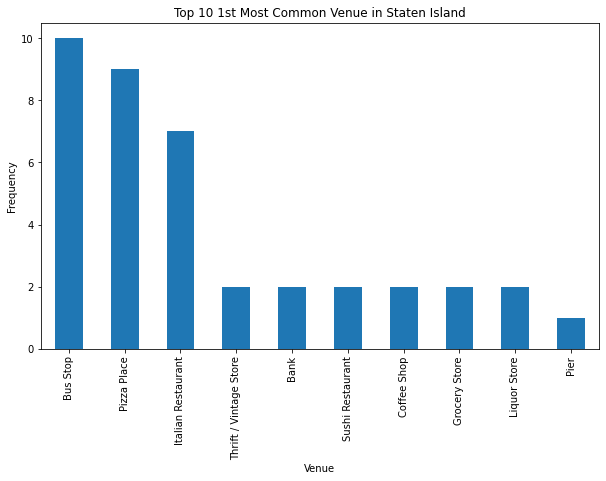

In [100]:
first_staten.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 1st Most Common Venue in Staten Island')
plt.ylabel('Frequency')
plt.xlabel('Venue')

plt.show()

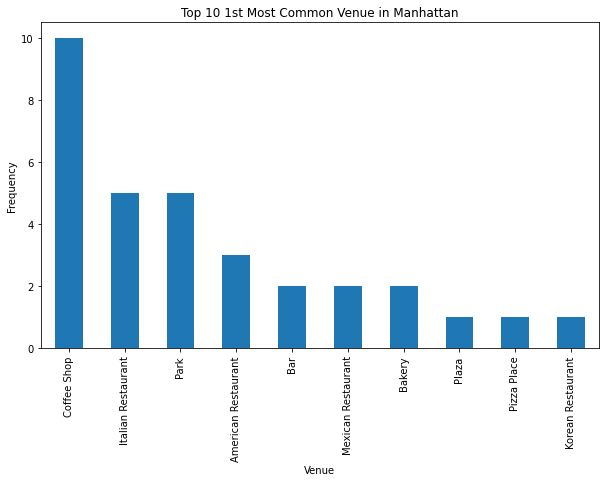

In [101]:
first_man.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 1st Most Common Venue in Manhattan')
plt.ylabel('Frequency')
plt.xlabel('Venue')

plt.show()

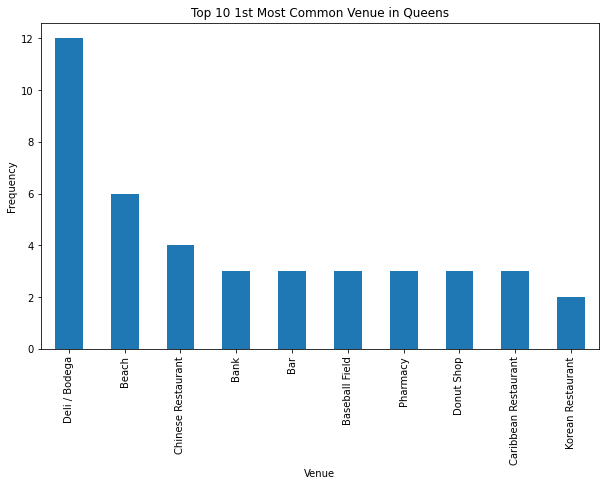

In [102]:
first_queens.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 1st Most Common Venue in Queens')
plt.ylabel('Frequency')
plt.xlabel('Venue')

plt.show()

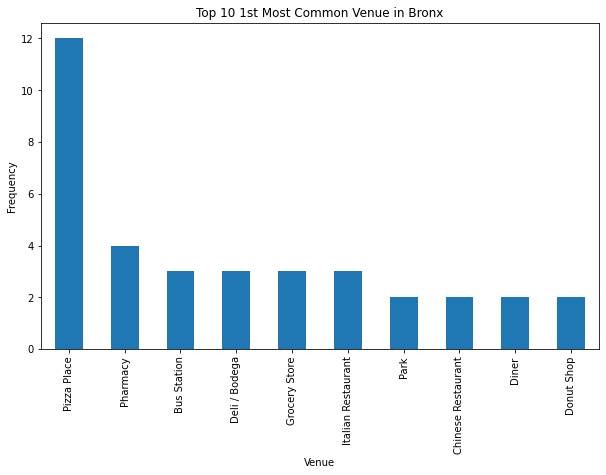

In [103]:
first_bronx.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 1st Most Common Venue in Bronx')
plt.ylabel('Frequency')
plt.xlabel('Venue')

plt.show()

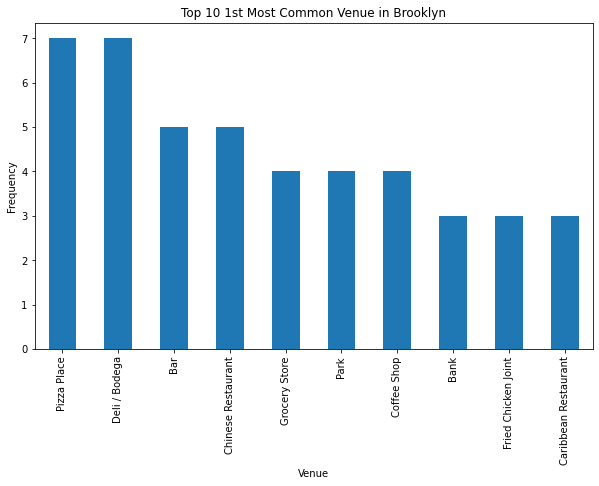

In [104]:
first_brook.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 1st Most Common Venue in Brooklyn')
plt.ylabel('Frequency')
plt.xlabel('Venue')

plt.show()

## We must also analyze each cluster for each Boroug to see what we can find.

## 1. Manhattan

### Cluster 1

In [105]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Pizza Place,Grocery Store,Bank,Mobile Phone Shop,New American Restaurant,Deli / Bodega,Sandwich Place,Tapas Restaurant
3,Inwood,Mexican Restaurant,Café,Restaurant,Bakery,Pizza Place,Lounge,Spanish Restaurant,Wine Bar,Caribbean Restaurant,Chinese Restaurant
4,Hamilton Heights,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Park,Deli / Bodega,Yoga Studio,Bakery,Liquor Store,Indian Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Spa,Latin American Restaurant,Sandwich Place,Deli / Bodega,New American Restaurant,French Restaurant,Gas Station


### Cluster 2

In [106]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Gym,Sandwich Place,Yoga Studio,Department Store,Steakhouse,Shopping Mall,Clothing Store,Coffee Shop,Seafood Restaurant,Diner
1,Chinatown,Bakery,Chinese Restaurant,Cocktail Bar,Hotpot Restaurant,American Restaurant,Spa,Dessert Shop,Salon / Barbershop,Ice Cream Shop,Boutique
6,Central Harlem,Public Art,Gym / Fitness Center,Seafood Restaurant,Bar,Fried Chicken Joint,Art Gallery,French Restaurant,Chinese Restaurant,African Restaurant,American Restaurant
8,Upper East Side,Exhibit,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Bakery,Juice Bar,French Restaurant,American Restaurant,Spa,Hotel
13,Lincoln Square,Plaza,Performing Arts Venue,Theater,Concert Hall,Café,Bakery,Indie Movie Theater,Gym / Fitness Center,Wine Shop,Gym
14,Clinton,American Restaurant,Coffee Shop,Gym / Fitness Center,Theater,Italian Restaurant,Gym,Spa,Hotel,Wine Shop,Cocktail Bar
15,Midtown,Hotel,Coffee Shop,Steakhouse,Clothing Store,Theater,Sandwich Place,Bookstore,Bakery,Sporting Goods Shop,Indian Restaurant
16,Murray Hill,Coffee Shop,Sandwich Place,Hotel,American Restaurant,Japanese Restaurant,Gym / Fitness Center,Sushi Restaurant,Burger Joint,Gym,Pub
17,Chelsea,Coffee Shop,Bakery,French Restaurant,American Restaurant,Art Gallery,Nightclub,Italian Restaurant,Wine Shop,Seafood Restaurant,Ice Cream Shop
19,East Village,Bar,Mexican Restaurant,Wine Bar,Speakeasy,Pizza Place,Vegetarian / Vegan Restaurant,Italian Restaurant,Korean Restaurant,Coffee Shop,Cocktail Bar


### Cluster 3

In [107]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Manhattanville,Coffee Shop,Chinese Restaurant,Mexican Restaurant,Seafood Restaurant,Food Truck,Deli / Bodega,Italian Restaurant,Bus Station,Café,Diner
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Deli / Bodega,Sushi Restaurant,Japanese Restaurant,Wine Shop,Mexican Restaurant,Park
10,Lenox Hill,Coffee Shop,Italian Restaurant,Cocktail Bar,Pizza Place,Sushi Restaurant,Café,Gym,Gym / Fitness Center,Burger Joint,Salad Place
11,Roosevelt Island,Park,Metro Station,Supermarket,Bridge,Bubble Tea Shop,Gym,Greek Restaurant,Noodle House,Soccer Field,Outdoors & Recreation
12,Upper West Side,Italian Restaurant,Bakery,Indian Restaurant,Bar,Sushi Restaurant,Mediterranean Restaurant,Coffee Shop,Café,Wine Bar,Breakfast Spot
18,Greenwich Village,Italian Restaurant,Clothing Store,Sushi Restaurant,Indian Restaurant,Boutique,Coffee Shop,Dessert Shop,Gourmet Shop,Sandwich Place,Bubble Tea Shop
21,Tribeca,Park,American Restaurant,Italian Restaurant,Wine Bar,Café,Spa,Bakery,Men's Store,Gym / Fitness Center,Cocktail Bar
23,Soho,Clothing Store,Italian Restaurant,Shoe Store,Bakery,Coffee Shop,Sporting Goods Shop,Women's Store,Salon / Barbershop,Art Gallery,Boutique
24,West Village,Italian Restaurant,New American Restaurant,American Restaurant,Cocktail Bar,Park,Coffee Shop,Jazz Club,Wine Bar,Boutique,French Restaurant
26,Morningside Heights,Coffee Shop,American Restaurant,Bookstore,Park,Café,Burger Joint,Deli / Bodega,Food Truck,Mexican Restaurant,Tennis Court


### Cluster 4

In [108]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Park,Bar,Coffee Shop,Gas Station,Fountain,Heliport,Baseball Field,Bistro,Farmers Market,Boat or Ferry


### Cluster 5

In [109]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Midtown South,Korean Restaurant,Hotel,Dessert Shop,Cosmetics Shop,American Restaurant,Coffee Shop,Cocktail Bar,Japanese Restaurant,Ramen Restaurant,Hotel Bar


## Brooklyn

### Cluster 1

In [110]:
brook_merged.loc[brook_merged['Cluster Labels'] == 0, brook_merged.columns[[1] + list(range(5, brook_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Chinese Restaurant,American Restaurant,Bar,Greek Restaurant,Playground,Sandwich Place
1,Bensonhurst,Chinese Restaurant,Pizza Place,Donut Shop,Ice Cream Shop,Sushi Restaurant,Italian Restaurant,Spa,Noodle House,Smoke Shop,Grocery Store
3,Greenpoint,Bar,Coffee Shop,Cocktail Bar,Pizza Place,Record Shop,Deli / Bodega,French Restaurant,Grocery Store,Polish Restaurant,Yoga Studio
4,Gravesend,Pizza Place,Lounge,Bakery,Italian Restaurant,Bar,Furniture / Home Store,Donut Shop,Electronics Store,Pharmacy,Fish Market
5,Brighton Beach,Restaurant,Eastern European Restaurant,Russian Restaurant,Pharmacy,Sushi Restaurant,Bank,Beach,Mobile Phone Shop,Gourmet Shop,Coffee Shop
6,Sheepshead Bay,Turkish Restaurant,Dessert Shop,Yoga Studio,Buffet,Café,Outlet Store,Fishing Store,Boat or Ferry,Grocery Store,Miscellaneous Shop
8,Flatbush,Deli / Bodega,Coffee Shop,Caribbean Restaurant,Lounge,Donut Shop,Plaza,Pizza Place,Sandwich Place,Pharmacy,Gastropub
9,Crown Heights,Pizza Place,Museum,Café,Playground,Metro Station,Coffee Shop,Bank,Bakery,Bagel Shop,Sushi Restaurant
11,Kensington,Grocery Store,Thai Restaurant,Pizza Place,Ice Cream Shop,Pub,Supermarket,Music Venue,Gas Station,Pharmacy,Coffee Shop
12,Windsor Terrace,Park,Plaza,Grocery Store,Diner,Middle Eastern Restaurant,Beer Store,Bookstore,Thrift / Vintage Store,Salad Place,Sushi Restaurant


### Cluster 2

In [111]:
brook_merged.loc[brook_merged['Cluster Labels'] == 1, brook_merged.columns[[1] + list(range(5, brook_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Mill Island,Locksmith,Pool,Other Great Outdoors,Paper / Office Supplies Store,Pakistani Restaurant,Outlet Store,Outdoors & Recreation,Outdoor Gym,Other Repair Shop,Other Nightlife


### Cluster 3

In [112]:
brook_merged.loc[brook_merged['Cluster Labels'] == 2, brook_merged.columns[[1] + list(range(5, brook_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Sunset Park,Mexican Restaurant,Latin American Restaurant,Bank,Bakery,Pizza Place,Mobile Phone Shop,Gym,Fried Chicken Joint,Pharmacy,Creperie
10,East Flatbush,Chinese Restaurant,Department Store,Supermarket,Fast Food Restaurant,Pharmacy,Liquor Store,Park,Moving Target,Caribbean Restaurant,Print Shop
14,Brownsville,Fried Chicken Joint,Chinese Restaurant,Playground,Park,Performing Arts Venue,Spanish Restaurant,Pharmacy,Trail,Moving Target,Convenience Store
25,Cypress Hills,Fried Chicken Joint,Spanish Restaurant,Ice Cream Shop,Fast Food Restaurant,Latin American Restaurant,Pizza Place,Gas Station,Supermarket,Caribbean Restaurant,Mobile Phone Shop
26,East New York,Spanish Restaurant,Chinese Restaurant,Deli / Bodega,Plaza,Fried Chicken Joint,Event Service,Pharmacy,Pizza Place,Fast Food Restaurant,Food Truck
27,Starrett City,Convenience Store,Bus Station,Caribbean Restaurant,Pharmacy,Shopping Mall,Pizza Place,Moving Target,Liquor Store,Bus Stop,Chinese Restaurant
29,Flatlands,Pharmacy,Caribbean Restaurant,Fried Chicken Joint,Fast Food Restaurant,Video Store,Paper / Office Supplies Store,Lounge,Park,Bar,Discount Store
34,Borough Park,Bank,Pizza Place,Pharmacy,Fast Food Restaurant,Restaurant,Hotel,Coffee Shop,Bistro,Toy / Game Store,Bakery
44,City Line,Donut Shop,Bakery,Deli / Bodega,Liquor Store,Chinese Restaurant,Grocery Store,Sandwich Place,Fast Food Restaurant,Convenience Store,Pharmacy
47,Prospect Park South,Caribbean Restaurant,Pizza Place,Grocery Store,Mobile Phone Shop,Fast Food Restaurant,Donut Shop,Clothing Store,Pharmacy,Department Store,Mexican Restaurant


### Cluster 4

In [113]:
brook_merged.loc[brook_merged['Cluster Labels'] == 3, brook_merged.columns[[1] + list(range(5, brook_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Manhattan Terrace,Pizza Place,Chinese Restaurant,Ice Cream Shop,Donut Shop,Japanese Restaurant,Cosmetics Shop,Pharmacy,Mobile Phone Shop,Bank,Bagel Shop
31,Manhattan Beach,Bus Stop,Café,Pizza Place,Harbor / Marina,Sandwich Place,Playground,Beach,Food,Ice Cream Shop,Organic Grocery
36,Gerritsen Beach,Harbor / Marina,Bar,Department Store,Pizza Place,Soccer Field,Gas Station,Skating Rink,Seafood Restaurant,Bagel Shop,Event Space
45,Bergen Beach,Harbor / Marina,Playground,Park,Athletics & Sports,Baseball Field,Other Repair Shop,Paper / Office Supplies Store,Pakistani Restaurant,Outlet Store,Outdoors & Recreation
46,Midwood,Pizza Place,Ice Cream Shop,Pharmacy,Candy Store,Bakery,Bagel Shop,Video Game Store,Convenience Store,Yoga Studio,Paper / Office Supplies Store
68,Madison,Bagel Shop,Italian Restaurant,Hobby Shop,Spa,Candy Store,Pilates Studio,Pizza Place,Dessert Shop,Restaurant,Deli / Bodega


### Cluster 5

In [114]:
brook_merged.loc[brook_merged['Cluster Labels'] == 4, brook_merged.columns[[1] + list(range(5, brook_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,Paerdegat Basin,Gym,Food,Bus Line,Asian Restaurant,Yoga Studio,Other Nightlife,Pakistani Restaurant,Outlet Store,Outdoors & Recreation,Outdoor Gym


## Bronx

### Cluster 1

In [115]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 0, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Fieldston,Plaza,River,Bus Station,Medical Supply Store,Accessories Store,Peruvian Restaurant,Nightclub,Other Great Outdoors,Outlet Store,Paper / Office Supplies Store


### Cluster 2

In [116]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 1, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wakefield,Pharmacy,Dessert Shop,Deli / Bodega,Ice Cream Shop,Laundromat,Donut Shop,Sandwich Place,Accessories Store,Outlet Store,Paper / Office Supplies Store
4,Riverdale,Bus Station,Park,Plaza,Playground,Gym,Home Service,Medical Supply Store,Baseball Field,Bank,Accessories Store
15,Fordham,Fast Food Restaurant,Shoe Store,Donut Shop,Mobile Phone Shop,Clothing Store,Bank,Pharmacy,Supplement Shop,Supermarket,Spanish Restaurant
17,West Farms,Donut Shop,Bus Stop,Bus Station,Park,Basketball Court,Diner,Sandwich Place,Cuban Restaurant,Convenience Store,Playground
21,Port Morris,Brewery,Restaurant,Storage Facility,Grocery Store,Peruvian Restaurant,Spanish Restaurant,Furniture / Home Store,Donut Shop,Latin American Restaurant,Distillery
22,Longwood,Deli / Bodega,Diner,Latin American Restaurant,Donut Shop,Sandwich Place,Grocery Store,Mexican Restaurant,Fast Food Restaurant,Pet Store,Outlet Store
26,Clason Point,Park,Recording Studio,South American Restaurant,Pool,Playground,Convenience Store,Bus Stop,Boat or Ferry,Home Service,Grocery Store
34,Spuyten Duyvil,Park,Scenic Lookout,Grocery Store,Tennis Court,Tennis Stadium,Thai Restaurant,Bank,Intersection,Pharmacy,Pet Store
36,Pelham Bay,Bank,Fast Food Restaurant,Diner,Italian Restaurant,Gym / Fitness Center,Donut Shop,Convenience Store,Latin American Restaurant,Asian Restaurant,Dive Bar
41,Pelham Gardens,Pharmacy,Bus Station,Spanish Restaurant,Boat or Ferry,Grocery Store,Bank,Sandwich Place,Playground,Mobile Phone Shop,Locksmith


### Cluster 3

In [117]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 2, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Co-op City,Pizza Place,Accessories Store,Basketball Court,Donut Shop,Restaurant,Fast Food Restaurant,Pharmacy,Park,Bus Station,Discount Store
2,Eastchester,Bus Station,Caribbean Restaurant,Diner,Deli / Bodega,Seafood Restaurant,Food & Drink Shop,Bus Stop,Bowling Alley,Pizza Place,Platform
5,Kingsbridge,Pizza Place,Bar,Sandwich Place,Latin American Restaurant,Bakery,Mexican Restaurant,Supermarket,Burger Joint,Fast Food Restaurant,Donut Shop
6,Woodlawn,Pub,Deli / Bodega,Food & Drink Shop,Pizza Place,Playground,Park,Grocery Store,Food Truck,Pharmacy,Bar
7,Norwood,Pizza Place,Park,Bank,Chinese Restaurant,Pharmacy,Sandwich Place,Bus Station,Spanish Restaurant,Fried Chicken Joint,Grocery Store
8,Williamsbridge,Nightclub,Soup Place,Bar,Caribbean Restaurant,Accessories Store,Music Venue,Other Great Outdoors,Outlet Store,Paper / Office Supplies Store,Park
9,Baychester,Donut Shop,Burger Joint,Mexican Restaurant,Pet Store,Spanish Restaurant,Bus Station,Shopping Mall,Other Great Outdoors,Fried Chicken Joint,Supermarket
10,Pelham Parkway,Italian Restaurant,Pizza Place,Food,Gas Station,Bus Station,Smoke Shop,Donut Shop,Frozen Yogurt Shop,Chinese Restaurant,Performing Arts Venue
11,City Island,Thrift / Vintage Store,Seafood Restaurant,Bar,Park,Spanish Restaurant,Café,Music Venue,Harbor / Marina,History Museum,French Restaurant
12,Bedford Park,Diner,Pizza Place,Mexican Restaurant,Chinese Restaurant,Sandwich Place,Deli / Bodega,Baseball Field,Grocery Store,Bus Station,Pub


### Cluster 4

In [118]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 3, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Country Club,Sandwich Place,Playground,Athletics & Sports,Accessories Store,Peruvian Restaurant,Nail Salon,Nightclub,Other Great Outdoors,Outlet Store,Paper / Office Supplies Store


### Cluster 5

In [119]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 4, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Edenwald,Fried Chicken Joint,Supermarket,Grocery Store,Moving Target,Music Venue,Nail Salon,Nightclub,Other Great Outdoors,Outlet Store,Paper / Office Supplies Store


## Queens

### Cluster 1

In [120]:
queens_merged.loc[queens_merged['Cluster Labels'] == 0, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,Breezy Point,Beach,Monument / Landmark,Trail,Supermarket,Nail Salon,North Indian Restaurant,Noodle House,Nightclub,New American Restaurant,Museum
50,Neponsit,Beach,Yoga Studio,Nail Salon,Office,North Indian Restaurant,Noodle House,Nightclub,New American Restaurant,Museum,Organic Grocery


### Cluster 2

In [121]:
queens_merged.loc[queens_merged['Cluster Labels'] == 1, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Bar,Middle Eastern Restaurant,Greek Restaurant,Hookah Bar,Indian Restaurant,Mediterranean Restaurant,Pizza Place,Bakery,Seafood Restaurant,Dessert Shop
1,Woodside,Grocery Store,Thai Restaurant,Bakery,Filipino Restaurant,Latin American Restaurant,American Restaurant,Donut Shop,Pub,Bar,Sandwich Place
2,Jackson Heights,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Thai Restaurant,Mexican Restaurant,Diner,Spanish Restaurant,Grocery Store
3,Elmhurst,Thai Restaurant,Bubble Tea Shop,Mexican Restaurant,Chinese Restaurant,Vietnamese Restaurant,Ice Cream Shop,Bar,Food Court,Sushi Restaurant,Seafood Restaurant
4,Howard Beach,Pharmacy,Italian Restaurant,Sandwich Place,Deli / Bodega,Fast Food Restaurant,Ice Cream Shop,Tapas Restaurant,Flower Shop,Sushi Restaurant,Mexican Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
75,Roxbury,Baseball Field,Irish Pub,Deli / Bodega,Beach,Trail,Fast Food Restaurant,Nightclub,Optical Shop,Office,North Indian Restaurant
76,Middle Village,Ice Cream Shop,Bakery,Dance Studio,Diner,Playground,Cosmetics Shop,Pizza Place,Park,Sandwich Place,South American Restaurant
77,Malba,Tennis Court,Bus Line,Rest Area,Vegetarian / Vegan Restaurant,Yoga Studio,Museum,North Indian Restaurant,Noodle House,Nightclub,New American Restaurant
78,Hammels,Beach,Building,Diner,Dog Run,Fast Food Restaurant,Shoe Store,Food Truck,Bus Stop,Bus Station,Fried Chicken Joint


### Cluster 3

In [122]:
queens_merged.loc[queens_merged['Cluster Labels'] == 2, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Somerville,Park,Yoga Studio,Nail Salon,Office,North Indian Restaurant,Noodle House,Nightclub,New American Restaurant,Museum,Organic Grocery


### Cluster 4

In [123]:
queens_merged.loc[queens_merged['Cluster Labels'] == 3, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,Jamaica Estates,Intersection,Yoga Studio,Nail Salon,Optical Shop,Office,North Indian Restaurant,Noodle House,Nightclub,New American Restaurant,Museum


### Cluster 5

In [124]:
queens_merged.loc[queens_merged['Cluster Labels'] == 4, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
79,Bayswater,Playground,Yoga Studio,Museum,Office,North Indian Restaurant,Noodle House,Nightclub,New American Restaurant,Nail Salon,Multiplex


## Staten Island

### Cluster 1

In [125]:
staten_merged_2.loc[staten_merged_2['Cluster Labels'] == 0, staten_merged_2.columns[[1] + list(range(5, staten_merged_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Stapleton,Pizza Place,Discount Store,Coffee Shop,Bar,Bank,Restaurant,Sandwich Place,Performing Arts Venue,Residential Building (Apartment / Condo),Park
3,Rosebank,Grocery Store,Italian Restaurant,Discount Store,Cosmetics Shop,Breakfast Spot,Taco Place,Storage Facility,Museum,Pharmacy,Ice Cream Shop
8,Port Richmond,Rental Car Location,Donut Shop,Park,Martial Arts School,Pier,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Performing Arts Venue,Peruvian Restaurant
11,Castleton Corners,Pizza Place,Grocery Store,Mexican Restaurant,Tattoo Parlor,Go Kart Track,Bar,Bank,Ice Cream Shop,Bagel Shop,Burger Joint
12,New Springville,Pizza Place,Chinese Restaurant,Health & Beauty Service,Restaurant,Mobile Phone Shop,Liquor Store,Sandwich Place,Shopping Mall,Coffee Shop,Pharmacy
15,Oakwood,Nightlife Spot,Lawyer,Home Service,Bar,Pier,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park
16,Great Kills,Bar,Pizza Place,Italian Restaurant,Liquor Store,Bakery,Food & Drink Shop,Cosmetics Shop,Pharmacy,Basketball Court,Chinese Restaurant
18,Annadale,Pizza Place,Restaurant,American Restaurant,Diner,Train Station,Dance Studio,Cosmetics Shop,Pharmacy,Food,Outlet Mall
19,Woodrow,Pharmacy,Diner,Bakery,Cosmetics Shop,Pizza Place,Coffee Shop,Chinese Restaurant,Gift Shop,Sushi Restaurant,Home Service
23,Sunnyside,American Restaurant,Market,Grocery Store,Gym,Spa,Yoga Studio,Pet Store,Other Repair Shop,Outdoors & Recreation,Outlet Mall


### Cluster 2

In [126]:
staten_merged_2.loc[staten_merged_2['Cluster Labels'] == 1, staten_merged_2.columns[[1] + list(range(5, staten_merged_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,New Brighton,Bus Stop,Park,Bowling Alley,Deli / Bodega,Botanical Garden,Playground,Discount Store,Pet Store,Residential Building (Apartment / Condo),Outdoors & Recreation
6,Todt Hill,Park,Trail,Yoga Studio,Pier,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Performing Arts Venue,Peruvian Restaurant
24,Park Hill,Bus Stop,Athletics & Sports,Hotel,Park,Gym / Fitness Center,Coffee Shop,Pier,Outdoors & Recreation,Outlet Mall,Performing Arts Venue
45,Bloomfield,Theme Park,Recreation Center,Burger Joint,Bus Stop,Yoga Studio,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Performing Arts Venue
52,Randall Manor,Bus Stop,Bookstore,Park,Pizza Place,Yoga Studio,Pharmacy,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Performing Arts Venue
56,Willowbrook,Bus Stop,Pizza Place,Intersection,Spa,Bagel Shop,Pharmacy,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park


### Cluster 3

In [127]:
staten_merged_2.loc[staten_merged_2['Cluster Labels'] == 2, staten_merged_2.columns[[1] + list(range(5, staten_merged_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Emerson Hill,Construction & Landscaping,Sculpture Garden,Yoga Studio,Pier,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Performing Arts Venue,Peruvian Restaurant


### Cluster 4

In [128]:
staten_merged_2.loc[staten_merged_2['Cluster Labels'] == 3, staten_merged_2.columns[[1] + list(range(5, staten_merged_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St. George,Clothing Store,Italian Restaurant,Sporting Goods Shop,Deli / Bodega,Bar,Coffee Shop,Farmers Market,Outlet Mall,Park,Scenic Lookout
4,West Brighton,Coffee Shop,Salon / Barbershop,Bar,Bank,Breakfast Spot,Italian Restaurant,Music Store,Deli / Bodega,Bus Stop,Café
7,South Beach,Pier,Deli / Bodega,Bus Stop,Athletics & Sports,Beach,Yoga Studio,Outdoors & Recreation,Outlet Mall,Park,Performing Arts Venue
9,Mariner's Harbor,Deli / Bodega,Bus Stop,Supermarket,Other Repair Shop,Italian Restaurant,Athletics & Sports,Pier,Outdoors & Recreation,Outlet Mall,Park
13,Travis,Gym,Hotel,Bowling Alley,Deli / Bodega,Baseball Field,Home Service,Café,Donut Shop,Park,Comedy Club
14,New Dorp,Italian Restaurant,Pizza Place,Indian Restaurant,Bakery,Hobby Shop,Deli / Bodega,Gas Station,Dessert Shop,Dim Sum Restaurant,Coffee Shop
17,Eltingville,Sushi Restaurant,Pizza Place,Sandwich Place,Fast Food Restaurant,Bank,Italian Restaurant,Deli / Bodega,Café,Bus Stop,Gourmet Shop
20,Tottenville,Thrift / Vintage Store,Italian Restaurant,Deli / Bodega,Bus Stop,Cosmetics Shop,Mexican Restaurant,Pizza Place,Outlet Mall,Park,Performing Arts Venue
21,Tompkinsville,Brewery,Supermarket,Rock Club,Recording Studio,Liquor Store,Pool,Deli / Bodega,Pizza Place,Gas Station,Gastropub
22,Silver Lake,Golf Course,American Restaurant,Burger Joint,Gym,Pharmacy,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Performing Arts Venue


### Cluster 5

In [129]:
staten_merged_2.loc[staten_merged_2['Cluster Labels'] == 4, staten_merged_2.columns[[1] + list(range(5, staten_merged_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Grymes Hill,Dog Run,Deli / Bodega,Yoga Studio,Pier,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Performing Arts Venue,Peruvian Restaurant
